In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [99]:
DATA_FILE = r'..\Data\rm_working_files\right_move_data_final2.csv'

In [100]:
df = pd.read_csv(DATA_FILE,index_col=None)

In [101]:
feature_cols = ['bedrooms','propertyType','bourough','outdoor space','nearest stattion','number of stops within 2kms',
                'population', 'median wage', 'total number of schools_y', 'percentage attedning private school']

In [102]:
X = pd.get_dummies(data=df[feature_cols], drop_first=True)
y = df.price

In [103]:
X.head()

,bedrooms,outdoor space,nearest stattion,number of stops within 2kms,population,median wage,total number of schools_y,percentage attedning private school,propertyType_bungalow,propertyType_cottage,...,bourough_lewisham,bourough_merton,bourough_newham,bourough_redbridge,bourough_richmond upon thames,bourough_southwark,bourough_sutton,bourough_tower hamlets,bourough_waltham forest,bourough_wandsworth
0,3,True,354.186247,5,206100,31400,78,0.04,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,False,0.000000,0,190100,27000,71,0.04,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5,False,0.000000,0,190100,27000,71,0.04,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,False,0.000000,0,311200,22800,103,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,False,0.000000,0,312500,25100,109,0.03,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7,shuffle=True,random_state=101)

In [105]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (8673, 48) and size 416304
X_test shape (3717, 48) and size 178416
y_train shape (8673,) and size 8673
y_test shape (3717,) and size 3717


In [106]:
linreg = LinearRegression()

In [107]:
linreg.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = linreg.predict(X_test)

In [109]:
y_pred

array([402986.36615883, 757701.45401489, 504916.76901181, ...,
       414521.87601713, 479626.62429716, 547438.5295049 ])

In [110]:
# Model evaluation metrics for regression(degree=1)
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))
print("Model Score for Training data: {}".format(linreg.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))

y-intercept             :  -239114.5205318469
beta coefficients       :  [ 8.29184308e+04  2.05789613e+04  3.45821090e+00  8.65644471e+03
 -1.11548522e+00  1.34034396e+01  4.50633991e+03 -2.29583606e+04
  1.19733934e+05  9.24552500e+04  2.59951997e+04  1.14434736e+05
  2.58973399e+04 -3.55642636e+04  6.79493724e+04  7.87909401e+04
 -2.16473617e+04  9.85379443e+04 -6.32087331e+03  3.21371611e+04
 -4.97640337e+04  3.22653509e+04 -4.54721026e+04  9.07099222e+03
 -9.80396476e+04 -2.46545158e+05  8.26157273e+04  9.46003265e+03
 -3.15460932e+04  1.01855319e+05  3.54293852e+04  3.03272609e+04
  4.54116083e+04 -1.05337675e+05 -1.38310444e+05 -6.23594889e+04
  1.94125482e+05  2.47913363e+05 -2.44734200e+04  3.61832911e+04
 -1.01474310e+04 -2.30605998e+05  1.26436386e+05  8.93828755e+04
 -1.46473802e+05  6.94109009e+04  3.96009783e+04  4.28963362e+04]
Mean Abs Error   MAE    :  96131.28169535093
Mean Sq  Error MSE      :  15295372283.156023
Root Mean Sq Error RMSE :  123674.4609171838
r2 value  

So with linear regression,
R-squared=0.638 indicates that the model has 64% information to make an accurate prediction about London house prices.
RMSE=2058185 indicates that the model is 123674 which means that there's an average error of $123674 in prediction of house price.

C:\Users\jwpow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

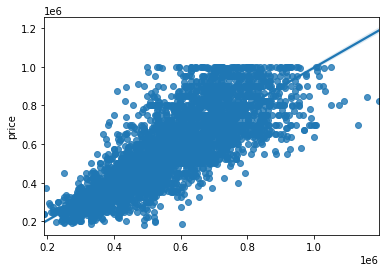

In [111]:
sns.regplot(y_pred,y_test)

In [1]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))
print("Model Score for Training data: {}".format(linreg.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))

NameError: name 'X_train' is not defined

In [ ]:
# I will shuffle the data before rerunning the cross validation above
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kf = KFold(10, shuffle=True, random_state=1)

 #instanciate the model
lr = LinearRegression()
    
cv_score = cross_val_score(lr, X, y,cv=kf)
print(f'Cross validation score: {cv_score}')
print(f'Mean of cross validation: {np.mean(cv_score)}')
print(f'Std deviation: {np.std(cv_score)}')
    
y_pred = cross_val_predict(lr, X, y, cv=kf)
    
R2 = metrics.r2_score(y, y_pred)
print(f'Cross predicted R2:{R2}')
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [ ]:
# usig kfolds appears to improve the R2 and RMSE values somewhat